In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
import os
files = os.listdir('.')
referencia = '../../res/luces.txt'

files=[a for a in files if a.find('.txt')> -1]
files.sort()
files_1 = [a for a in files if a.find('1.txt')> -1]
files_5 = [a for a in files if a.find('5.txt')> -1]
files_10 = [a for a in files if a.find('10.txt')> -1]
files_15 = [a for a in files if a.find('15.txt')> -1]
files_20 = [a for a in files if a.find('20.txt')> -1]
files_30 = [a for a in files if a.find('30.txt')> -1]
files_50 = [a for a in files if a.find('50.txt')> -1]
files_100 = [a for a in files if a.find('100.txt')> -1]

In [3]:
def error_vector(v1, v2):
    res = 0
    for i in range(3):
        res += (v1[i]-v2[i])**2
    return math.sqrt(res)

In [4]:
def error_total(m1, m2):
    res = []
    for i in range(len(m1)):
        res.append(error_vector(m1[i],m2[i]))
    return res

In [5]:
def dame_errores(files, referencia):
    data = []
    referencia_data = []
    for elem  in files:
        temp = open(elem)
        next(temp)
        data.append((np.loadtxt(temp)))
    with open(referencia) as ref:
        next(ref)
        referencia_data = np.loadtxt(ref)
    error_cromada = error_total(data[0], referencia_data)
    error_mate = error_total(data[1], referencia_data)
    return error_cromada, error_mate

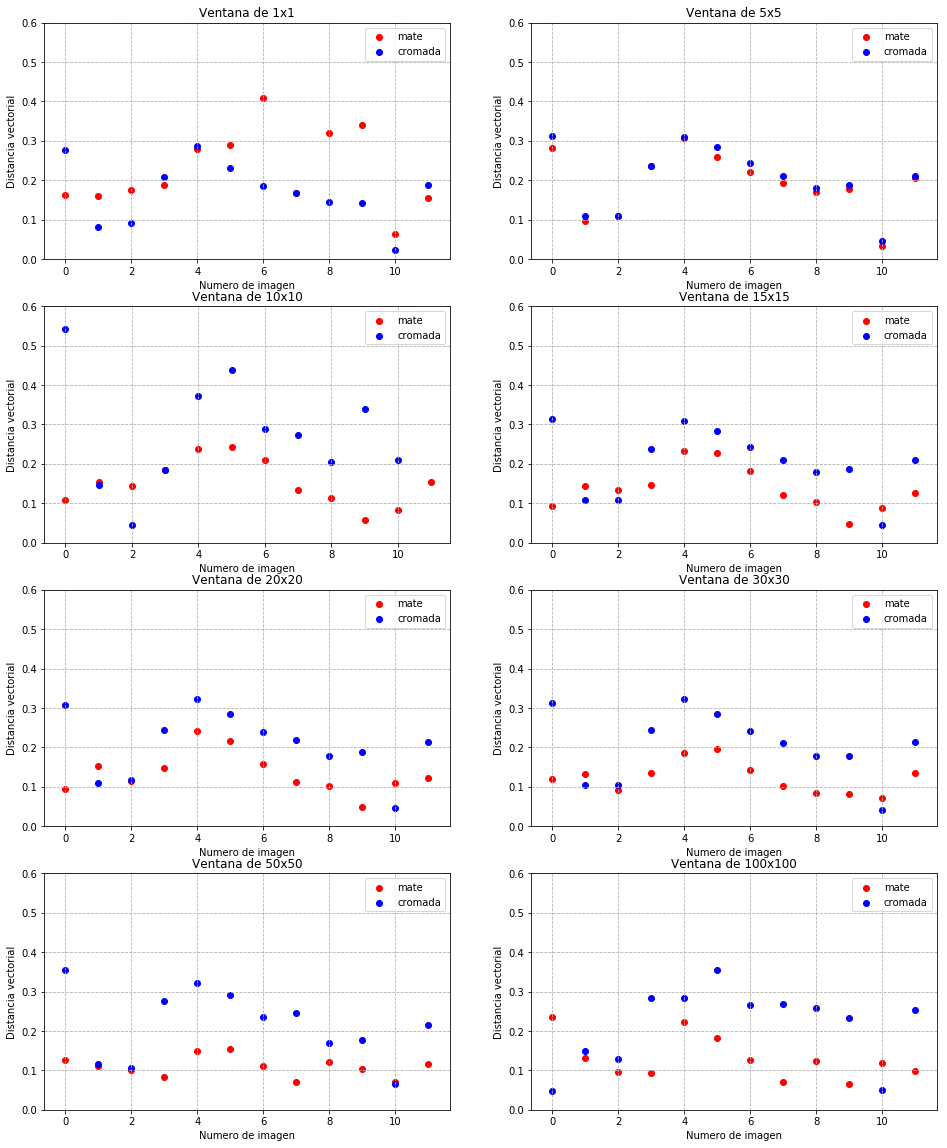

In [6]:
files = [files_1, files_5, files_10, files_15, files_20, files_30, files_50, files_100]
title = ["1","5","10", "15", "20", "30", "50", "100"]
fig, ((a1, a2), (a3, a4), (a5, a6), (a7, a8)) = plt.subplots(4, 2)
subplot = [a1,a2,a3,a4,a5,a6,a7,a8]
suma_error_mate = []
suma_error_cromada = []
fig.set_figwidth(16)
fig.set_figheight(20)

for i, elem in enumerate(files):
    error_crom, error_mate = dame_errores(elem, referencia) 
    suma_error_mate.append(sum(error_mate)/12)
    suma_error_cromada.append(sum(error_crom)/12)
    subplot[i].scatter(range(len(error_mate)), error_mate, color='red', label='mate')
    subplot[i].scatter(range(len(error_crom)), error_crom, color='blue', label='cromada')
    subplot[i].set_title("Ventana de " + title[i] + "x" + title[i])
    subplot[i].legend()
    subplot[i].set_xlabel("Numero de imagen")
    subplot[i].set_ylabel("Distancia vectorial")
    subplot[i].set_ylim(0, 0.6)
    subplot[i].grid(True, linestyle="dashed")

plt.show()

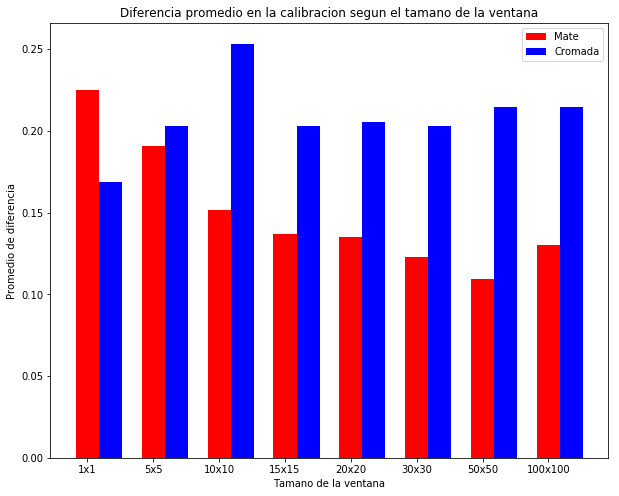

In [8]:
fig, ax = plt.subplots()
e_mate = np.array(suma_error_mate)
e_crom = np.array(suma_error_cromada)
index = np.arange(8)
sizes = ["1x1", "5x5", "10x10", "15x15", "20x20", "30x30","50x50", "100x100"]
bar_width = 0.35
fig.set_figwidth(10)
fig.set_figheight(8)
rects1 = plt.bar(index, e_mate, bar_width,color='red', label='Mate')

rects2 = plt.bar(index + bar_width, e_crom, bar_width,color='blue',label='Cromada')
plt.legend()
plt.xticks(index,sizes)
plt.ylabel('Promedio de diferencia')
plt.xlabel('Tamano de la ventana')
plt.title('Diferencia promedio en la calibracion segun el tamano de la ventana')
plt.show()